Problem statement : The objective of this project is to build a time series forecasting model that enables Google stock to make informed decisions based on future trends and predictions.

In [33]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 

Lets gather the data and do EDA

In [34]:
# Fetching the Data 

start =  "2012-01-01"
end = "2023-12-31"
stock = "GOOG"

data = yf.download(stock, start, end)

c:\Users\HP\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [35]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400


As the data contains share price of google we dont have any null Values 

In [36]:
# Adding Index to the data 

data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3013,2023-12-22,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
3014,2023-12-26,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
3015,2023-12-27,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
3016,2023-12-28,141.850006,142.270004,140.828003,141.279999,141.279999,12192500


In [37]:
# Finding Moving Average 

ma_100_days = data.Close.rolling(100).mean()

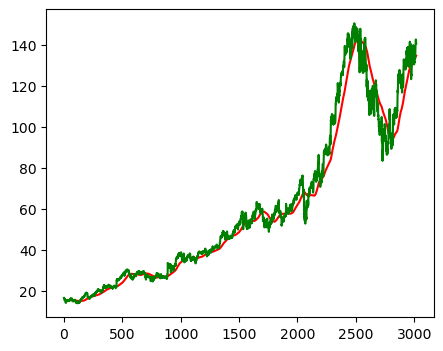

In [38]:

plt.figure(figsize=(5,4))
plt.plot(ma_100_days, "r")
plt.plot(data.Close, "g")
plt.show()

In [39]:
ma_200_days = data.Close.rolling(200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

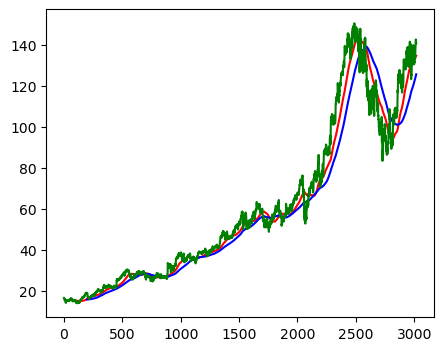

In [40]:
plt.figure(figsize=(5,4))
plt.plot(ma_100_days,"r")
plt.plot(ma_200_days,"b")
plt.plot(data.Close,"g")
plt.show

In [41]:
data.dropna(inplace = True)

In [42]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [43]:
data_train.shape[0]

2414

In [44]:
data_test.shape[0]

604

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [46]:
data_train_scale = scaler.fit_transform(data_train)

In [47]:
x = []
y = []

for i in range (100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [48]:
x, y = np.array(x), np.array(y)

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [50]:
# creating a model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences= True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.20))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
# compiling our model 

model.compile(optimizer = "adam", loss = "mean_squared_error")

In [52]:
# fitting the model 

model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 26s 214ms/step - loss: 0.0330
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 15s 209ms/step - loss: 0.0037
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 16s 214ms/step - loss: 0.0032
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 230ms/step - loss: 0.0029
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 228ms/step - loss: 0.0032
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 17s 238ms/step - loss: 0.0025
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 260ms/step - loss: 0.0024
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 247ms/step - loss: 0.0022
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - loss: 0.0022
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 278ms/step - loss: 0.0024
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 277ms/step - loss: 0.0020
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - loss: 0.0020
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 269ms/step - loss: 0.0018
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 20s 274ms/step - loss: 0.0023
Epoch 15/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [54]:
# testing the model

pas_100_days = data_train.tail(100)

In [55]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True)

In [56]:
data_test_scale = scaler.fit_transform(data_test)

In [57]:
x = []
y = []

for i in range (100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [58]:
#predicting the values 
y_predict = model.predict(x)

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 178ms/step


In [59]:
y_predict 

array([[0.7770344 ],
       [0.780137  ],
       [0.7830755 ],
       [0.78617793],
       [0.7894889 ],
       [0.79304713],
       [0.79680777],
       [0.8007478 ],
       [0.80447733],
       [0.80749375],
       [0.80954635],
       [0.810887  ],
       [0.8122751 ],
       [0.81448686],
       [0.81801516],
       [0.8228286 ],
       [0.82898235],
       [0.8364464 ],
       [0.8449612 ],
       [0.8541616 ],
       [0.8632876 ],
       [0.8717515 ],
       [0.87932307],
       [0.8858199 ],
       [0.89115644],
       [0.8948676 ],
       [0.89691514],
       [0.89756155],
       [0.89746416],
       [0.8971421 ],
       [0.89645743],
       [0.89480907],
       [0.89192003],
       [0.8880659 ],
       [0.88385487],
       [0.8799812 ],
       [0.87680703],
       [0.8735807 ],
       [0.8693059 ],
       [0.8632658 ],
       [0.8556847 ],
       [0.84683365],
       [0.83745784],
       [0.8285419 ],
       [0.8210843 ],
       [0.81583846],
       [0.8129826 ],
       [0.811

In [60]:
# now as you can see the predicted values are in between 0 and 1
# converting them into orignal values 

scale = 1/scaler.scale_

In [61]:
y_predict =  y_predict*scale

In [62]:
y = y*scale

<function matplotlib.pyplot.show(close=None, block=None)>

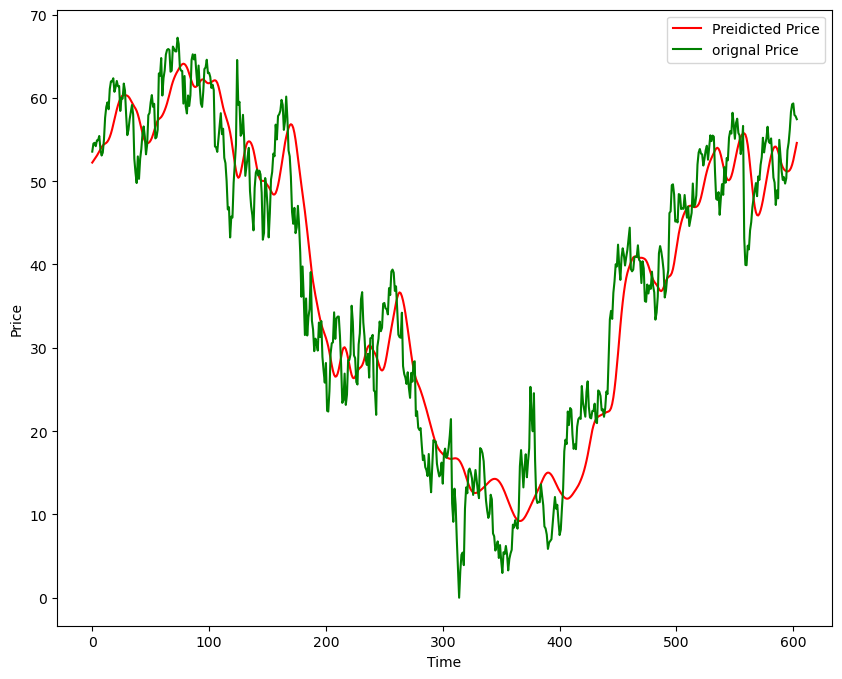

In [63]:
plt.figure(figsize = (10, 8))
plt.plot(y_predict, "r", label = "Preidicted Price")
plt.plot(y , "g", label = "orignal Price")
plt.xlabel("Time")
plt.ylabel('Price')
plt.legend()
plt.show

In [64]:
model.save("Stock Predictions Model.keras")